<a href="https://colab.research.google.com/github/zmiern/ie423/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfSls =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')

In [5]:
dfSls.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Prepare Data

In [6]:
# Aggregate by user ID
dfBFSls = (dfSls.groupby('User_ID').agg({'Product_ID':'nunique','Purchase':'sum'})
             .rename(columns={'Product_ID':'purchase_count', 'Purchase':'purchase_amt'})
            )
dfBFSls

,purchase_count,purchase_amt
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001
...,...,...
1006036,514,4116058
1006037,122,1119538
1006038,12,90034


In [9]:
# Scale data

X = dfBFSls
X[X.columns] = scale(X[X.columns])

Text(0, 0.5, 'Purchase Amount')

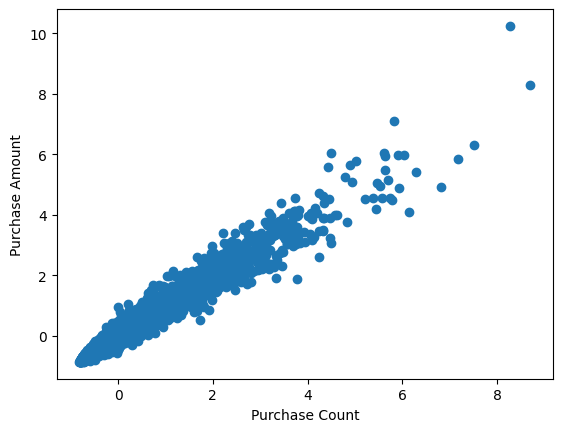

In [10]:
# Visualize scatterplot

plt.scatter(X['purchase_count'],X['purchase_amt'])
plt.xlabel('Purchase Count')
plt.ylabel('Purchase Amount')

### K-Means Clustering

In [11]:
# Build k-Means Clustering model

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=42)
mdlKmcRtc.fit(X)
kMeans_labels = mdlKmcRtc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering')

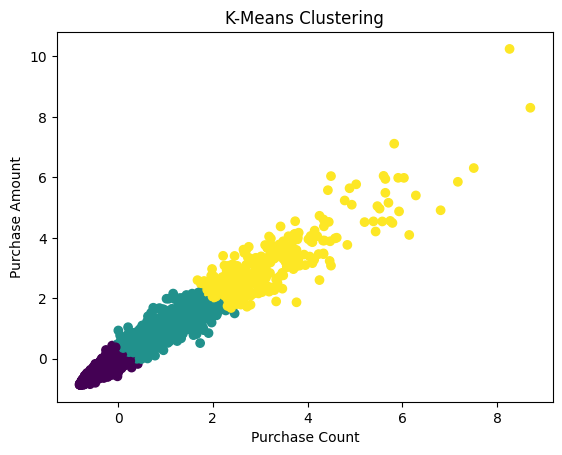

In [12]:
# Display k-Means cluster on scatter plot

plt.scatter(X['purchase_count'],X['purchase_amt'],c=kMeans_labels)
plt.xlabel('Purchase Count')
plt.ylabel('Purchase Amount')
plt.title('K-Means Clustering')

In [13]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, mdlKmcRtc.labels_)


0.6652767061197826

In [14]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [15]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2 		 Silhouette Score:  0.7261408452722743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  3 		 Silhouette Score:  0.6652767061197826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4 		 Silhouette Score:  0.6076933751194181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  5 		 Silhouette Score:  0.5846368698345823


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6 		 Silhouette Score:  0.5749005958029301


The best cluster size seems to be '2' at which the Silhouette Score is 0.726.

### Hierarchical Clustering

In [16]:
# Generate linkages between data points
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'ward')

Text(0.5, 1.0, 'Hierarchical Clustering')

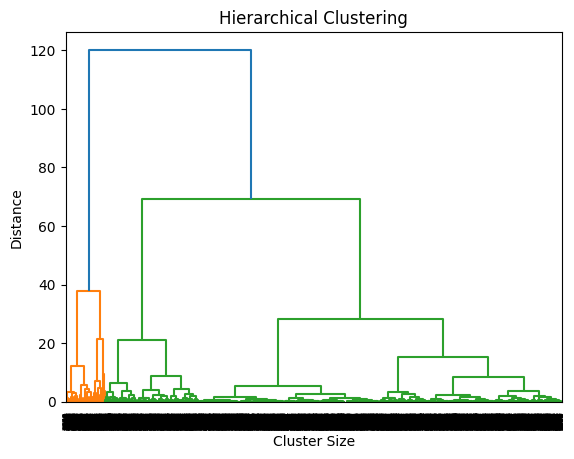

In [18]:
# Visualize Dendrogram of Clusters

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

2 or 3 clusters are ideal.

Having said that, when building a hierarchical clustering model, we do provide K as an input so it doesn't have to build the full dendrogram (especially for large datasets).

In [19]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=3)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_

In [20]:
silhouette_score(X, mdlHrcRtc.labels_)

0.6415136338507116

Text(0.5, 1.0, 'Hierarchical Clustering')

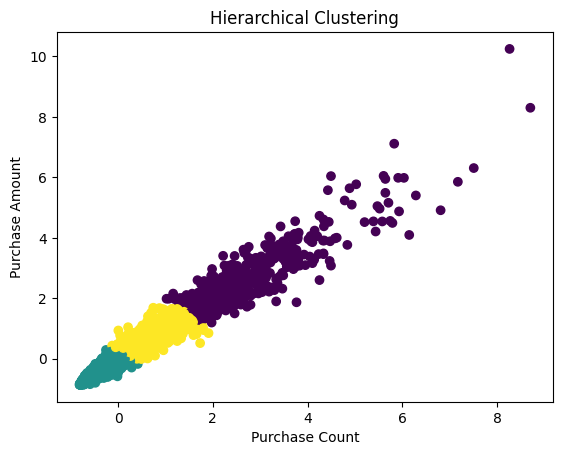

In [21]:
# Display Hierarchical cluster on scatter plot

plt.scatter(X['purchase_count'],X['purchase_amt'],c=hClust_labels)
plt.xlabel('Purchase Count')
plt.ylabel('Purchase Amount')
plt.title('Hierarchical Clustering')

In [22]:
# Function for Hierarchical Clustering
def cluster_hierarchy(X, k):
    mdlHrcRtc = AgglomerativeClustering(n_clusters=k)
    mdlHrcRtc.fit(X)
    hClust_labels = mdlHrcRtc.labels_
    hClust_sil_score = silhouette_score(X, mdlHrcRtc.labels_)
    return (hClust_labels, hClust_sil_score)


In [23]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    hClust_labels, hClust_sil_score = cluster_hierarchy(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', hClust_sil_score)

k:  2 		 Silhouette Score:  0.7454258816188772
k:  3 		 Silhouette Score:  0.6415136338507116
k:  4 		 Silhouette Score:  0.6399901867458228
k:  5 		 Silhouette Score:  0.506267207431757
k:  6 		 Silhouette Score:  0.5070500323467254


Even in Hierarchical Clustering, the ideal cluster size is '2', which is reassuring.  However, the cluster labels seem to be slightly better now with a Silhouette Score of 0.745 over the score of 0.726 in K-Means Clustering.

utexas_ds_orie_divider_gray.png

### DBScan Clustering and Anomaly Detection

In [33]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsBFSales = DBSCAN(eps=0.2)
mdlDbsBFSales.fit(X)
dbscan_labels = mdlDbsBFSales.labels_



In [27]:
silhouette_score(X, dbscan_labels)

0.6568861530009426

In [28]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

4

In [29]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

60

Text(0.5, 1.0, 'DBScan Clustering')

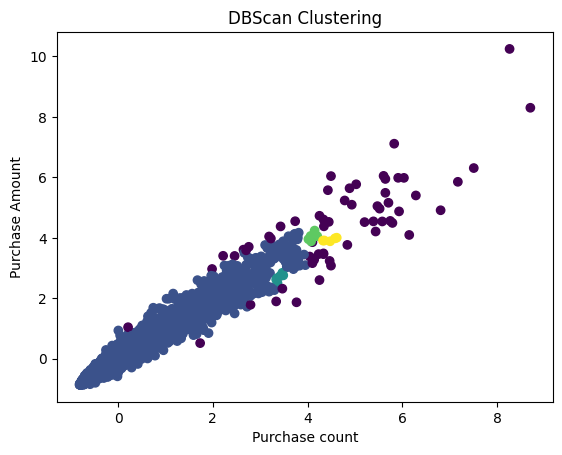

In [30]:
# Display DBScan cluster on scatter plot

plt.scatter(X['purchase_count'],X['purchase_amt'],c=dbscan_labels)
plt.xlabel('Purchase count')
plt.ylabel('Purchase Amount')
plt.title('DBScan Clustering')

In [31]:
# Function for DBScan Clustering

def cluster_dbscan(X, e):
    mdlDbsRtc = DBSCAN(eps=e)
    mdlDbsRtc.fit(X)
    dbscan_labels = mdlDbsRtc.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)

    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

In [32]:
# Iterate over different values of eps to determine best silhouette score

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  10 	 Noise:  255 	 Silhouette Score:  0.5661972006437398
eps:  0.2 	 Clusters:  4 	 Noise:  60 	 Silhouette Score:  0.6568861530009426
eps:  0.3 	 Clusters:  1 	 Noise:  40 	 Silhouette Score:  0.8024435045110658
eps:  0.4 	 Clusters:  3 	 Noise:  20 	 Silhouette Score:  0.7872811055480032
eps:  0.5 	 Clusters:  3 	 Noise:  15 	 Silhouette Score:  0.7927236996940684
eps:  0.6 	 Clusters:  3 	 Noise:  7 	 Silhouette Score:  0.7943119387842261
eps:  0.7 	 Clusters:  2 	 Noise:  6 	 Silhouette Score:  0.8011975322057425


Highest Silhouette Score is 0.802.

-eps:  0.3 	 Clusters:  1 	 Noise:  40 	 Silhouette Score:  0.8024435045110658

utexas_ds_orie_divider_gray.png